In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("Airbnb_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
Manhattan = df[df["neighbourhood_group"] == 'Manhattan']
Manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
Rows = len(Manhattan)
Rows

21661

In [5]:
Columns = len(Manhattan.columns)
Columns

16

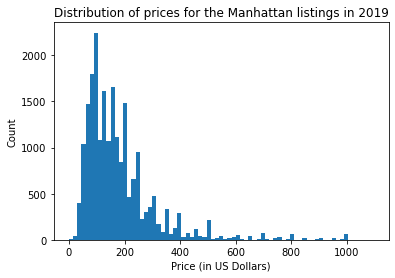

In [6]:
plt.hist(Manhattan["price"], bins= np.arange(0, 1100, 15))
plt.title("Distribution of prices for the Manhattan listings in 2019")
plt.xlabel("Price (in US Dollars)")
plt.ylabel("Count")
plt.show()

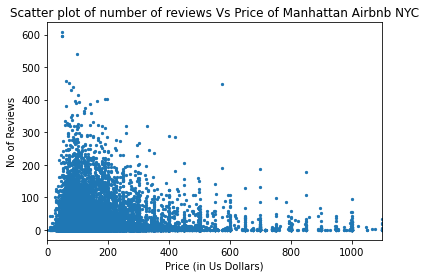

In [7]:
plt.scatter(x = Manhattan["price"], y= Manhattan["number_of_reviews"],  s=5)
plt.title("Scatter plot of number of reviews Vs Price of Manhattan Airbnb NYC")
plt.xlim(0,1100)
plt.xlabel("Price (in Us Dollars)")
plt.ylabel("No of Reviews")
plt.show()

In [8]:
#Top = (Manhattan.assign(new =Manhattan['neighbourhood'].map(df['neighbourhood'].value_counts()))
         #.sort_values(['new','neighbourhood'], ascending=[False, True])
         #.drop('new', axis=1))
#Top

In [9]:
Top_10 = Manhattan['neighbourhood'].value_counts().head(10)
Top_10

Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64

In [10]:
Top_10.index.name = 'neighbourhood'
Top_10 = Top_10.reset_index(name='count')
Top_10

,neighbourhood,count
0,Harlem,2658
1,Upper West Side,1971
2,Hell's Kitchen,1958
3,East Village,1853
4,Upper East Side,1798
5,Midtown,1545
6,East Harlem,1117
7,Chelsea,1113
8,Lower East Side,911
9,Washington Heights,899


In [11]:
#top = Top['neighbourhood'].isin(Top_10['neighbourhood'])
#Top.drop(Top[top].index, inplace=True)
#top = Top[~Top.isin(Top_10)].dropna()
#print(Top[~Top.neighbourhood.isin(Top_10.neighbourhood)])
top =  pd.merge(Manhattan, Top_10, how='outer', indicator=True)
top = top.loc[top._merge == 'both']
top

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,count,_merge
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1545.0,both
1,59855,One bedroom Apt. in NYC,288031,Leslie,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,2016-01-05,0.78,1,0,1545.0,both
2,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140,1545.0,both
3,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Driss,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,2019-07-03,0.57,1,98,1545.0,both
4,114969,"Manhattan Studio, Perfect Location",582598,Andrey,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,2018-09-24,0.40,1,0,1545.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18519,36307890,BEAUTIFUL BEDROOM IN NICE AREA UPTOWN NYC!,139296591,David,Manhattan,Washington Heights,40.83851,-73.94579,Private room,120,3,0,NaN,NaN,1,344,899.0,both
18520,36318764,"Modern, Artistic, Cheap & Chic",21357175,Tomy,Manhattan,Washington Heights,40.84150,-73.93661,Entire home/apt,107,4,0,NaN,NaN,1,9,899.0,both
18521,36368048,"Luxury appartment, special edition for musicians.",253681134,Azamat,Manhattan,Washington Heights,40.83423,-73.94723,Private room,74,3,0,NaN,NaN,1,3,899.0,both
18522,36413327,CHEAP AND COZY ROOM JUST 20 MIN AWAY FROM TIME...,255476470,Maria,Manhattan,Washington Heights,40.83331,-73.94547,Private room,50,5,0,NaN,NaN,1,51,899.0,both


In [12]:
top.drop("count",axis=1, inplace=True)
top

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,_merge
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,both
1,59855,One bedroom Apt. in NYC,288031,Leslie,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,2016-01-05,0.78,1,0,both
2,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140,both
3,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Driss,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,2019-07-03,0.57,1,98,both
4,114969,"Manhattan Studio, Perfect Location",582598,Andrey,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,2018-09-24,0.40,1,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18519,36307890,BEAUTIFUL BEDROOM IN NICE AREA UPTOWN NYC!,139296591,David,Manhattan,Washington Heights,40.83851,-73.94579,Private room,120,3,0,NaN,NaN,1,344,both
18520,36318764,"Modern, Artistic, Cheap & Chic",21357175,Tomy,Manhattan,Washington Heights,40.84150,-73.93661,Entire home/apt,107,4,0,NaN,NaN,1,9,both
18521,36368048,"Luxury appartment, special edition for musicians.",253681134,Azamat,Manhattan,Washington Heights,40.83423,-73.94723,Private room,74,3,0,NaN,NaN,1,3,both
18522,36413327,CHEAP AND COZY ROOM JUST 20 MIN AWAY FROM TIME...,255476470,Maria,Manhattan,Washington Heights,40.83331,-73.94547,Private room,50,5,0,NaN,NaN,1,51,both


In [13]:
Top_10.loc[:,'neighbourhood'].values.tolist()

['Harlem',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Midtown',
 'East Harlem',
 'Chelsea',
 'Lower East Side',
 'Washington Heights']

In [14]:
Top10_rows = len(top)
Top10_rows

15823

In [15]:
Top10_column = len(top.columns)
Top10_column

17

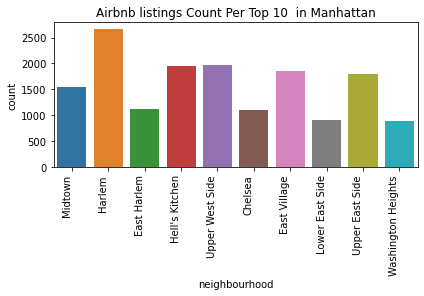

In [16]:
#sn.countplot(x = 'Neighbourhood', data = Top_10)
ax = sn.countplot(x="neighbourhood", data= top)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
plt.tight_layout()
plt.title("Airbnb listings Count Per Top 10  in Manhattan")
plt.show()